In [56]:
'''
https://www.youtube.com/watch?v=uBIi9xctaT0
'''


'\nhttps://www.youtube.com/watch?v=uBIi9xctaT0\n'

In [57]:
import numpy as np
from datetime import datetime
import time
from scipy.stats import norm
import numpy.linalg as linalg


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rng = np.random.RandomState(0)
rng

In [3]:
W = rng.randn(1000, 2)
W

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       ...,
       [ 0.19782817,  0.0977508 ],
       [ 1.40152342,  0.15843385],
       [-1.14190142, -1.31097037]])

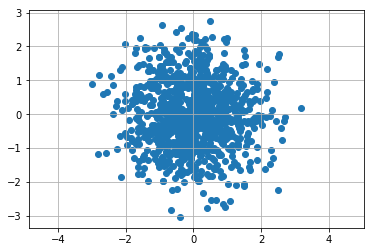

In [4]:
plt.scatter(W[:,0], W[:,1])
plt.axis('equal')
plt.grid(True)

In [5]:
A = rng.rand(2,2)

In [6]:
X = np.dot(W,A)

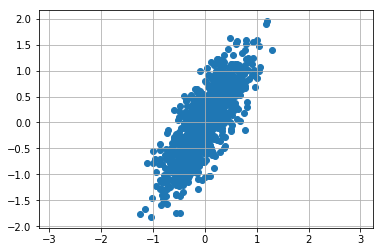

In [7]:
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')
plt.grid(True)

In [8]:
np.var(X[:,0])

0.16146981846434738

In [9]:
np.var(X[:,1])

0.4143398991106429

In [10]:
#Covariance Matrix
C = np.cov(X.T)
C
#Para encontrar el primer componente principal (PC1) debemos utilizar
#los autovalores y autovectores de la matriz de covarianza

array([[0.16163145, 0.20478164],
       [0.20478164, 0.41475465]])

In [11]:
#Calculate the eigevalues and eigenvectors
e, V = np.linalg.eig(C)

In [12]:
#Estos son los autovalores de la matriz covarianza
e

array([0.04745802, 0.52892809])

In [13]:
#Cada columna es un autovector de la matriz de covarianza
V
V[:,0]
V[:,1]

array([-0.48696515, -0.8734214 ])

In [14]:
u = V[:,1] #Autovector correspondiente al mayor d elos autovalores

u.shape

(2,)

In [15]:
Z = np.dot(X,u)
Z

array([-1.17872260e+00, -1.67083646e+00, -5.42281581e-01, -4.50054835e-01,
       -1.49630549e-01, -8.12269168e-01, -4.82851534e-01, -4.13935068e-01,
       -7.24293384e-01,  2.56764972e-01,  1.08498618e+00, -1.05035032e-01,
       -5.24777106e-01,  6.89320752e-02, -1.58913959e+00, -2.76301340e-01,
        1.48945097e+00,  1.13972764e-01, -1.28710989e+00,  3.66816432e-01,
        1.29605700e+00, -3.73859972e-02,  5.02961449e-01,  3.02369220e-01,
        1.00114961e+00,  3.01159990e-01,  8.77606353e-01, -2.00127945e-01,
       -1.89193247e-01,  5.34077500e-01,  5.53598044e-01,  1.31991367e+00,
        1.04083200e-01,  6.69936710e-01,  4.76422862e-01, -4.68835599e-01,
       -9.20823355e-03,  1.22048229e-01,  7.73917820e-01,  1.44291590e-01,
        1.91698044e-01,  5.15816460e-01, -1.77930619e+00, -5.62346642e-01,
        6.20310477e-02, -3.92377660e-01, -6.07277825e-01, -5.53286332e-01,
       -9.05310820e-01, -2.72772459e-01, -3.64317652e-01,  2.15510151e-01,
       -3.29112472e-01,  

In [16]:
np.var(Z) #Será un valor (teóricament eigual) al autovalor del cual estamos 
#partiendo, es decir el segundo elemento de la matriz e

0.5283991599193654

In [17]:
np.dot(u,u)

1.0000000000000002

In [18]:
Y = np.outer(Z,u)
Y.shape

(1000, 2)

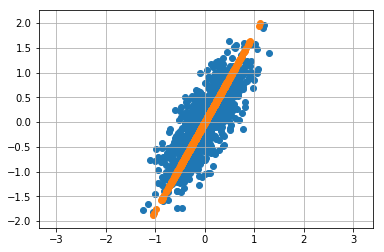

In [19]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(Y[:,0], Y[:,1])
plt.axis('equal')
plt.grid(True)

#Hasta aqui tenemos que hemos calculado la primera componente principal en base
#a la matriz de covarianza

# Using Scikit-learn

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
from sklearn import datasets
from sklearn.decomposition import PCA

In [26]:
iris = datasets.load_iris()

In [27]:
X = iris.data
y = iris.target

In [28]:
#El objetivo es reducir el número de columnas de X de 4 a 2 utilizando PCA
X.shape

(150, 4)

In [29]:
y.shape

(150,)

In [31]:
#Creamos el pca con 2 componentes
pca = PCA(2)

In [32]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [33]:
#Para ver las dos componentes que tenemos definidas
pca.components_
#Recordemos que estos son los dos primeros autovectores de la matriz de covarianza del
#conjunto de observaciones

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [35]:
#Vamos a transformar X en nuestro nuevo espacio de componentes principales
Z = pca.transform(X)

In [36]:
Z.shape

(150, 2)

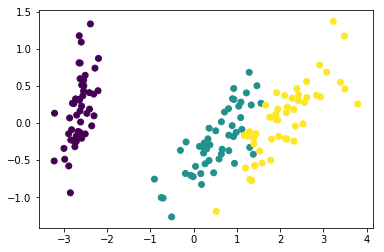

In [38]:
#El siguiente paso es comprobar cuanta información es preservada en este nuevo modelo
#y cuanta hemos perdido
plt.scatter(Z[:,0], Z[:,1], c=y)

Otro ejemplo..

In [39]:
digits = datasets.load_digits()

In [40]:
digits.data.shape
#¿Por qué 64?

(1797, 64)

In [41]:
#Cada dígito es una imagen de 8x8
digits.images.shape

(1797, 8, 8)

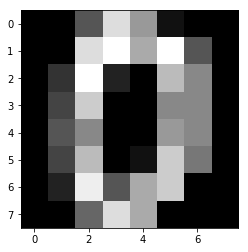

In [44]:
plt.imshow(digits.images[0], cmap='gray')
#imagen del 0

In [45]:
digits.target.shape

(1797,)

In [46]:
#¿Podemos reducir el número de variables?

In [49]:
pca = PCA(2)

In [50]:
pca.fit(digits.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [51]:
Z = pca.transform(digits.data)

In [52]:
Z.shape

(1797, 2)

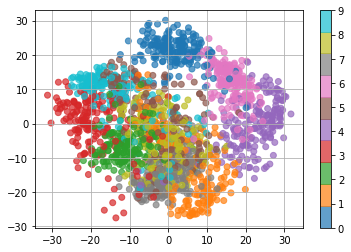

In [55]:
plt.scatter(Z[:,0], Z[:,1], c=digits.target, cmap='tab10', alpha=0.7)
plt.colorbar()
plt.grid(True)

Hemos conseguido obtener de tan sólo 2 componentes principales la información que encontrábamos en 64 componentes iniciales, es una herramienta muy potente